# Introducción

# Desarrollo

Hacemos primero la carga de datos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from scipy.io import arff
import sklearn.utils
import math

In [3]:
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


Se puede ver que posee 8 caracteristicas más la clase que puede ser positiva o negativa.

## Pregunta 1 (Pruebas)

a) Este dataset corresponde a pacientes indios de al menos 21 años. La idea es predecir si los pacientes poseen diabetes o no. Para ello se definen 8 caracteristicas que corresponden a datos de pacientes, con cada fila un paciente distinto.
Por ejemplo 'age' corresponde a la edad de paciente, es decir por ejemplo  21.0 corresponde a que el paciente posee 21 años.

La primera caracteristica 'preg' corresponde a cuantos embarazos a tenido el paciente. Luego la caracteristica 'plas' corresponde al nivel de glucosa del paciente despues de una prueba de diabetes de 2 horas.

La carácteristica 'pres' corresponde a la presion sanguinea del paciente (en mmHg). La cuarta caracteristica 'skin' corresponde al grosor de la piel en la zona de los triceps.

La quinta característica 'insu' corresponde a la cantidad de insulina despues de la prueba de 2 horas. La característica 'mass' corresponde al medidor BMI, que mide el peso en relacion con la altura.

La septima corresponde al nivel de pedigree de diabetes, es decir mide la historia genetica del paciente con diabetes, viendo antecedentes geneticos de la diabetes. Por ultimo 'age' es lo que definió antes, es decir, corresponde a la edad del paciente.

b) Primero separamos en dos sunconjuntos, el de clase positiva y el de clase negativa.

In [4]:
dfPositivos=df[df['class'][:]==df['class'][0]]

dfNegativos=df[df['class'][:]==df['class'][1]]

Luego cambiamos los valores de la clase a 1 si es clase positiva y 0 si es clase negativa.

In [6]:
dfPositivos['class'][:]=1
dfNegativos['class'][:]=0

c:\users\magicalgirl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\magicalgirl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
dfPositivos

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1
757,0.0,123.0,72.0,0.0,0.0,36.3,0.258,52.0,1
759,6.0,190.0,92.0,0.0,0.0,35.5,0.278,66.0,1
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1


In [8]:
dfNegativos

,preg,plas,pres,skin,insu,mass,pedi,age,class
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0


Luego los volvemos a juntar en su solo conjunto.

In [9]:
df=pd.concat([dfNegativos, dfPositivos])
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0,0
...,...,...,...,...,...,...,...,...,...
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1
757,0.0,123.0,72.0,0.0,0.0,36.3,0.258,52.0,1
759,6.0,190.0,92.0,0.0,0.0,35.5,0.278,66.0,1
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1


Reordenamos el conjunto que creamos y asignamos nuevos indices.

In [10]:
dfReordenado = sklearn.utils.shuffle(df)
dfReordenado.reset_index(inplace=True, drop=True)
vector=np.arange(768).tolist()
muestraDatos=dfReordenado.assign(index=lambda x: x.index+1)

Ahora definimos el conjunto $X$ y el conjunto $y$ que corresponden a las caracteristicas y a la clase respectivamente.

In [11]:
y=dfReordenado['class']
X=dfReordenado.iloc[:,0:8]

In [12]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0
1,1.0,122.0,90.0,51.0,220.0,49.7,0.325,31.0
2,2.0,112.0,66.0,22.0,0.0,25.0,0.307,24.0
3,2.0,197.0,70.0,99.0,0.0,34.7,0.575,62.0
4,4.0,117.0,62.0,12.0,0.0,29.7,0.380,30.0
...,...,...,...,...,...,...,...,...
763,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0
764,1.0,173.0,74.0,0.0,0.0,36.8,0.088,38.0
765,1.0,122.0,64.0,32.0,156.0,35.1,0.692,30.0
766,4.0,95.0,64.0,0.0,0.0,32.0,0.161,31.0


Ahora usamos train_test_split para definir los conjuntos de Entrenamiento, Validacion y Testing. Primero dividimos el conjunto en dos partes: Entrenamiento (80%) y Testing (20%). Y luego volvemos a definir el conjunto de de Entrenamiento en dos subconjuntos: el conjunto de Entrenamiento propiamente tal (0.75 % del 80% = 60 % del conjunto original) y el de Validacion (25% de 80% = 20% del conjunto original).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [14]:
X_train

,preg,plas,pres,skin,insu,mass,pedi,age
520,1.0,125.0,50.0,40.0,167.0,33.3,0.962,28.0
0,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0
36,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0
633,1.0,81.0,74.0,41.0,57.0,46.3,1.096,32.0
526,6.0,93.0,50.0,30.0,64.0,28.7,0.356,23.0
...,...,...,...,...,...,...,...,...
629,7.0,168.0,88.0,42.0,321.0,38.2,0.787,40.0
75,4.0,128.0,70.0,0.0,0.0,34.3,0.303,24.0
12,4.0,117.0,64.0,27.0,120.0,33.2,0.230,24.0
345,6.0,134.0,70.0,23.0,130.0,35.4,0.542,29.0


In [15]:
X_val

,preg,plas,pres,skin,insu,mass,pedi,age
356,0.0,95.0,80.0,45.0,92.0,36.5,0.330,26.0
389,4.0,154.0,62.0,31.0,284.0,32.8,0.237,23.0
498,2.0,119.0,0.0,0.0,0.0,19.6,0.832,72.0
473,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0
559,8.0,65.0,72.0,23.0,0.0,32.0,0.600,42.0
...,...,...,...,...,...,...,...,...
137,1.0,95.0,82.0,25.0,180.0,35.0,0.233,43.0
306,2.0,112.0,68.0,22.0,94.0,34.1,0.315,26.0
500,0.0,119.0,0.0,0.0,0.0,32.4,0.141,24.0
692,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25.0


In [16]:
X_test

,preg,plas,pres,skin,insu,mass,pedi,age
127,5.0,143.0,78.0,0.0,0.0,45.0,0.190,47.0
666,0.0,93.0,60.0,0.0,0.0,35.3,0.263,25.0
371,5.0,117.0,92.0,0.0,0.0,34.1,0.337,38.0
28,1.0,128.0,98.0,41.0,58.0,32.0,1.321,33.0
340,1.0,167.0,74.0,17.0,144.0,23.4,0.447,33.0
...,...,...,...,...,...,...,...,...
621,8.0,112.0,72.0,0.0,0.0,23.6,0.840,58.0
669,0.0,106.0,70.0,37.0,148.0,39.4,0.605,22.0
586,3.0,150.0,76.0,0.0,0.0,21.0,0.207,37.0
383,5.0,187.0,76.0,27.0,207.0,43.6,1.034,53.0


c)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

scaler=scaler.fit(X_train)

In [19]:
setEntrenamiento=scaler.transform(X_train)
setValidacion=scaler.transform(X_val)
setTesting=scaler.transform(X_test)

In [20]:
setEntrenamiento

array([[-0.84189992,  0.12612297, -1.03905938, ...,  0.21845057,
         1.44855384, -0.43611032],
       [-0.84189992, -0.63143828, -1.03905938, ..., -0.98617872,
         0.15060155, -0.60149429],
       [-0.54353785, -0.66300333, -0.18440169, ...,  0.16549983,
         1.16574313, -0.43611032],
       ...,
       [ 0.05318628, -0.12639745, -0.2912339 , ...,  0.20521289,
        -0.73057706, -0.76687825],
       [ 0.64991041,  0.41020844,  0.02926274, ...,  0.49644195,
         0.19823283, -0.35341834],
       [-1.14026198, -1.16804416, -0.2912339 , ...,  0.54939269,
         0.20716369, -1.0149542 ]])

d)

Despues de separar los conjuntos hay que buscar con GridSearchC los mejores estimadores, para esto se combina el conjunto de validacion y de entrenamiento.

In [21]:
from sklearn.model_selection import PredefinedSplit

Los juntamos en conjunto llamado conjuntoEntrenamiento y luego los transformamos con el scaler.

In [22]:
conjuntoEntrenamiento=pd.concat([X_train, X_val])
conjuntoEntrenamiento=scaler.transform(conjuntoEntrenamiento)
conjuntoEntrenamiento

array([[-0.84189992,  0.12612297, -1.03905938, ...,  0.21845057,
         1.44855384, -0.43611032],
       [-0.84189992, -0.63143828, -1.03905938, ..., -0.98617872,
         0.15060155, -0.60149429],
       [-0.54353785, -0.66300333, -0.18440169, ...,  0.16549983,
         1.16574313, -0.43611032],
       ...,
       [-1.14026198, -0.06326734, -3.70986465, ...,  0.09931141,
        -0.99552604, -0.76687825],
       [-0.84189992, -0.82082859, -0.18440169, ..., -1.59511221,
        -0.42097376, -0.68418627],
       [ 2.73844488,  1.16776968,  2.37957138, ...,  1.40984218,
        -0.65019928,  0.88696139]])

Tambien juntamos los dos conjuntos de clases: el de entrenamiento y validacion.

In [23]:
clasesEntrenamiento=pd.concat([y_train,y_val])
clasesEntrenamiento

520    1
0      0
36     1
633    0
526    0
      ..
137    1
306    0
500    1
692    0
291    1
Name: class, Length: 614, dtype: int64

Ademas guardamos los indices del set de Entrenamiento para despues separalos.

In [24]:
ps = PredefinedSplit(test_fold=y_train)

In [30]:
train_index, val_index=ps.split()
print(len(train_index[0])+len(train_index[1]))

460


Se ve que al usar los indices obtenidos se obtiene el mismo conjunto anterior de Entrenamiento. Ahora se usar GridSearchCV para encontrar el mejor estimador para un modelo SVM lineal. En este caso se usaran tres valores de C.

In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from time import time

In [32]:
parameters={'C' : [0.0001, 0.001, 0.1]}

In [33]:
svc = svm.SVC(kernel='linear', probability=False)
grid1 = GridSearchCV(svc, param_grid=parameters, cv=5)

grid1.get_params(deep=True)

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(kernel='linear'),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': [0.0001, 0.001, 0.1]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

Ahora contamos cuanto demora en encontrar el mejor estimador con el conjunto de Entrenamiento nuevo que definimos.

In [98]:
tic = time()
model1=grid1.fit(conjuntoEntrenamiento, clasesEntrenamiento)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 0.084s


Sacamos sus predicciones.

In [99]:
predictions=model1.predict(setValidacion)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

e) Y hacemos una matriz de confusion con los valores que obtuvimos con los que se tenian antes.

In [100]:
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

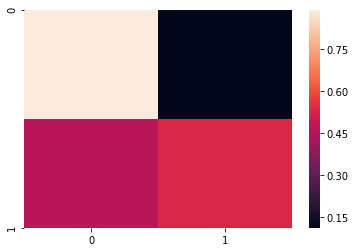

In [101]:
sns.heatmap(confusion_matrix(y_val,predictions, normalize='true'))

In [102]:
accuracy_score(y_val, predictions)

0.7597402597402597

Se ve que obtiene buenos resultados para no encontrar diabetes cuando no hay, pero no muy bueno en los otros casos. Su accuracy es de 0.759

f)

In [103]:
selector = SelectFromModel(model1.estimator).fit(setEntrenamiento, y_train)

In [104]:
selector.get_support()

array([False,  True, False, False, False,  True, False, False])

La caracteristica definitoria es la numero 6, es decir el pedigree de sangre y la 2 que corresponde al nivel de Glucosa en la sangre.

g)

In [162]:
nuevoConjunto=np.stack((setEntrenamiento[:,1],setEntrenamiento[:,5]),axis=1)
nuevoConjunto[0]

array([0.12612297, 0.21845057])

In [164]:
tic = time()
model1=model1.fit(nuevoConjunto, y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

modelFinalLineal=model1

Done in 0.064s


Se ve que demora lo mismo que con las caracteristicas completas.

In [107]:
setValidacion2=np.stack((setValidacion[:,1],setValidacion[:,5]),axis=1)
setValidacion2[0]

array([-0.82082859,  0.64205648])

In [108]:
predictions2=model1.predict(setValidacion2)

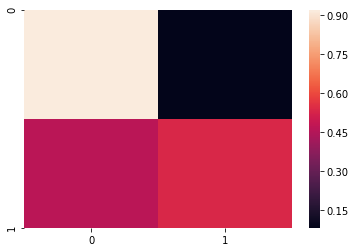

In [109]:
sns.heatmap(confusion_matrix(y_val,predictions2, normalize='true'))

In [110]:
accuracy_score(y_val, predictions2)

0.7792207792207793

En el caso con 0 predicted y 0 true,  predice bien, mientras que para clasificar diabetes le cuesta. Pero obtiene mejor accuracy que los valores anteriores.

i)

In [111]:
from sklearn.feature_selection import SelectKBest

In [112]:
kBest = SelectKBest(k=4).fit(setEntrenamiento,y_train)

In [113]:
X_new=kBest.transform(setEntrenamiento)

In [114]:
tic=time()
model1.fit(X_new,y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 0.075s


Demora lo mismo que con los otros casos.

In [115]:
set_new=kBest.transform(setValidacion)

In [116]:
predictions3=model1.predict(set_new)

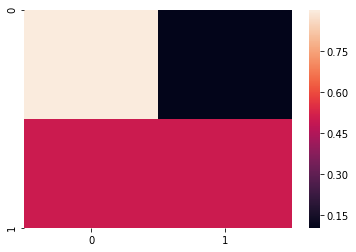

In [117]:
sns.heatmap(confusion_matrix(y_val,predictions3, normalize='true'))

In [118]:
accuracy_score(y_val, predictions3)

0.7532467532467533

Se ve que tiene problemas para distinguir si hay diabetes, cuando la clase real es 1. Pero no tiene problemas en definir que no hay diabetes cuando no hay. Su accuracy es similar al caso con clasificacion con todas las caracteristicas.

j)

In [119]:
kBest = SelectKBest(k=2).fit(setEntrenamiento,y_train)

In [120]:
X_new=kBest.transform(setEntrenamiento)

In [121]:
tic=time()
model1.fit(X_new,y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 0.075s


Demora menos tiempo que con todas las caracteristicas, pero es un tiempo similar.

In [123]:
set_new=kBest.transform(setValidacion)

In [124]:
predictions4=model1.predict(set_new)

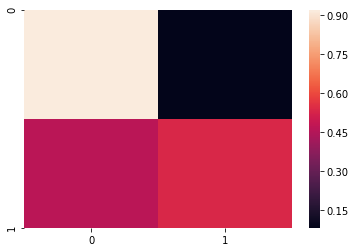

In [125]:
sns.heatmap(confusion_matrix(y_val,predictions4, normalize='true'))

In [126]:
accuracy_score(y_val, predictions4)

0.7792207792207793

Curiosamente, a pesar de tener menos caracteristicas posee mejores resultados que con 4 caracteristicas. Obteniendo un valor similar al escoger las mejores caracteristicas con SelectFromModel.


k)



In [127]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
clf = RandomForestClassifier(max_depth=3, random_state=0)

In [166]:
params={'n_estimators' : [50, 100, 150, 200, 250]}
grid2 = GridSearchCV(clf, param_grid=params, cv=5)

In [171]:
tic=time()
model2=grid2.fit(setEntrenamiento,y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

modelFinalRFC=model2

Done in 5.844s


Se demora bastante más que con el clasificador lineal SVM.

In [131]:
predictions5=model2.predict(setValidacion)

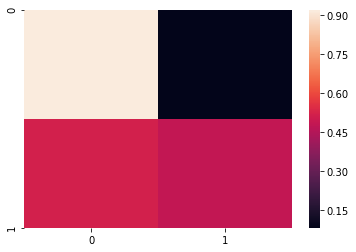

In [132]:
sns.heatmap(confusion_matrix(y_val,predictions5, normalize='true'))

In [133]:
accuracy_score(y_val, predictions5)

0.7597402597402597

Obtiene el mismo valor que con el clasificador lineal.

l)

In [134]:
selector = SelectFromModel(model2.estimator).fit(setEntrenamiento, y_train)

In [135]:
selector.get_support()

array([False,  True, False, False, False,  True, False,  True])

Segun esto las mejores caracteristicas son la 2, 6 y la 8.

In [136]:
nuevoConjunto=np.stack((setEntrenamiento[:,1],setEntrenamiento[:,5],setEntrenamiento[:,7]),axis=1)
nuevoConjunto[0]

array([ 0.12612297,  0.21845057, -0.43611032])

In [137]:
tic = time()
model2=model2.fit(nuevoConjunto, y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 5.417s


Se demora lo mismo que con todas las caracteristicas.

In [138]:
setValidacion3=np.stack((setValidacion[:,1],setValidacion[:,5], setValidacion[:,7]),axis=1)
setValidacion3[0]

array([-0.82082859,  0.64205648, -0.60149429])

In [139]:
predictions6=model2.predict(setValidacion3)

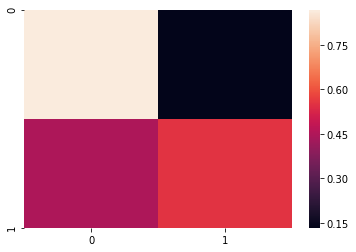

In [140]:
sns.heatmap(confusion_matrix(y_val,predictions6, normalize='true'))

In [142]:
accuracy_score(y_val, predictions6)

0.7532467532467533

Obtiene resultados muy similares a los otros experimentos con RFC.


m)

In [143]:
kBest = SelectKBest(k=4).fit(setEntrenamiento,y_train)

In [144]:
X_new=kBest.transform(setEntrenamiento)

In [145]:
tic=time()
model2.fit(X_new,y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 5.469s


El mismo tiempo que con las cuatro caracteristicas.

In [146]:
set_new=kBest.transform(setValidacion)

In [147]:
predictions7=model2.predict(set_new)

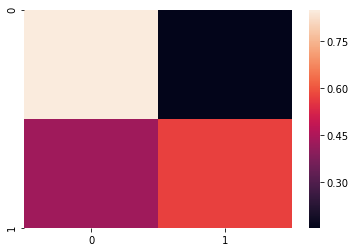

In [148]:
sns.heatmap(confusion_matrix(y_val,predictions7, normalize='true'))

In [149]:
accuracy_score(y_val, predictions7)

0.7467532467532467

Obtiene resultados similares que su analogo con el modelo lineal, y resultados muy similares a los otros experimentos.

n)

In [150]:
kBest = SelectKBest(k=2).fit(setEntrenamiento,y_train)

In [151]:
X_new=kBest.transform(setEntrenamiento)

In [152]:
tic=time()
model2.fit(X_new,y_train)
toc = time()

print(f"Done in {toc-tic:.3f}s")

Done in 7.691s


Aqui ocurre lo mismo que con los otros experimentos.

In [153]:
set_new=kBest.transform(setValidacion)

In [154]:
predictions8=model2.predict(set_new)

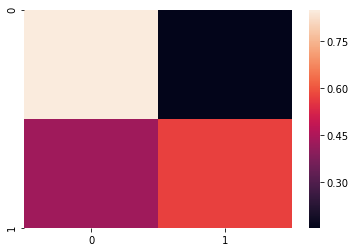

In [155]:
sns.heatmap(confusion_matrix(y_val,predictions7, normalize='true'))

In [157]:
accuracy_score(y_val, predictions8)

0.7402597402597403

o) Usaremos el de mejores caracteristicas con el SelectFromModel del clasificador lineal, y el con todas las caracteristicas del RFC.

In [176]:
nuevoConjuntoTSVM=np.stack((setTesting[:,1],setTesting[:,5]),axis=1)
nuevoConjuntoTSVM[0]

array([0.6942939 , 1.76725967])

In [181]:
predictionFinalLineal=modelFinalLineal.predict(nuevoConjuntoTSVM)

predictionFinalRFC=modelFinalRFC.predict(setTesting)

In [182]:
accuracy_score(y_test, predictionFinalLineal)

0.7857142857142857

In [183]:
accuracy_score(y_test, predictionFinalRFC)

0.8051948051948052

Al final el RFC obtuvo mejores resultado que el modelo lineal.

## Pregunta 2

a) En general obtienen resultados muy similares a pesar de tener tiempos de entrenamientos distintos, con el modelo lineal siendo un modelo más pequeño. Considerando las diferentes variaciones, parece que el modelo de RFC es más estable puesto que todos sus resultados se parecen entre sí, mientras que con el modelo Lineal tenia problemas clasificado con 4 caracteristicas.

Ahora respecto a resultado puro, el modelo lineal obtiene mejores resultados con el set de Validacion, respecto al de Testing, el mejor clasificador es el Random Forest Classifier.

b) Parece tener un efecto menor en reducir caracteristicas. Porque por lo menos con este conjunto de datos, el tener 2 o 4 caracteristicas no cambia mucho el resultado. Con el modelo lineal al tener accuracy similar entre estos experimentos no parece tener mucho peso en el resultado. Y respecto al modelo RFC tampoco era muy afectado puesto que entre tener todas las caracteristicas a tener 2 puesto que cambio de 0.75 a 0.74 con el Set de Validacion, lo que no es mucho. 

Mas bien pareciera ser una propiedad del conjunto de datos, es decir que para este caso, es un set de datos que se puede definir en 2 caracteristicas con buenos resultados.

c) En este caso, no hay recompenza por reducir el numero de caracteristicas, pero tampoco lo hay en tener todo el conjunto. Puesto que si con 2 caracteristicas ya se puede definir bien el resultado con un costo pequeño en la accuracy y tener un resultado similar a tener todas las caracteristicas. Quizas si se tuviese otro modelo se podrian encontrar otras relaciones en los datos. Pero como conclusion, en este conjunto es indiferente a la reduccion de caracteristicas.